In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
max_server = 10
available_server = 10
Q = np.zeros((11, 4, 2))

In [64]:
def server_done(available_server, prob):
    i = 0
    for _ in range(max_server - available_server):
        if np.random.rand() < prob:
            i += 1
    return available_server + i

In [65]:
alpha = 0.01
beta = 0.01
epsilon = 0.1

guest = np.random.randint(0, 4)
guest_reward = [1, 2, 4, 8]

state = (available_server, guest)
action = np.random.choice(np.where(Q[state] == np.max(Q[state]))[0])

average_R = 0

for i in range(2000000):
    if action == 0 or available_server == 0:
        reward = 0

    elif action == 1:
        reward = guest_reward[guest]
        available_server -= 1

    available_server = server_done(available_server, 0.06)
    guest = np.random.randint(0, 4)

    next_state = (available_server, guest)

    if np.random.rand() < epsilon:
        next_action = np.random.randint(0, 2)
    else:
        next_action = np.random.choice(np.where(Q[next_state] == np.max(Q[next_state]))[0])
        
    delta = reward - average_R + Q[next_state][next_action] - Q[state][action]
    average_R += beta * delta
    Q[state][action] += alpha * delta

    state = next_state
    action = next_action

my_Q = np.argmax(Q, axis=2).T

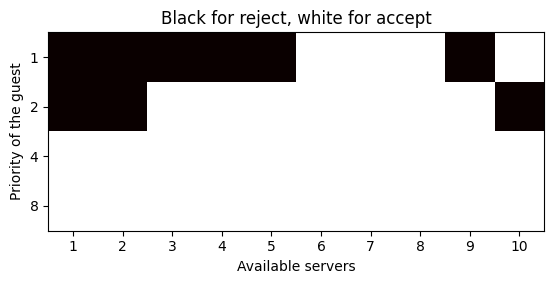

In [66]:
plt.imshow(my_Q[:,1:], cmap='hot', interpolation='nearest')
plt.xlabel('Available servers')
plt.ylabel('Priority of the guest')
plt.xticks([i for i in range(10)], [str(i) for i in range(1, 11)])
plt.yticks([0, 1, 2, 3], ['1', '2', '4', '8'])
plt.title('Black for reject, white for accept')

plt.show()

In [67]:
print(average_R)

2.580794634038771


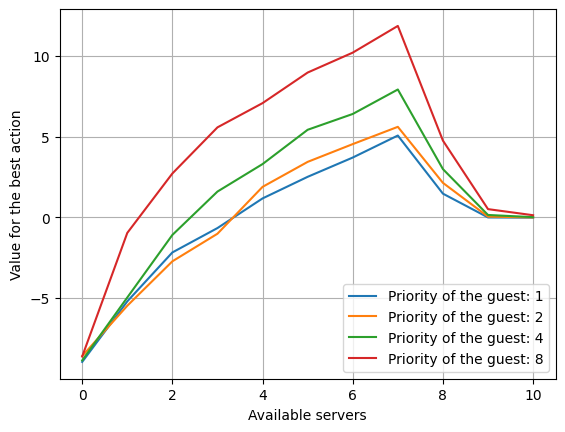

In [68]:
for i in range(4):
    plt.plot(np.max(Q[:,i,:], axis=1), label='Priority of the guest: ' + str(2**i))
plt.xlabel('Available servers')
plt.ylabel('Value for the best action')
plt.legend()
plt.grid()
plt.show()